In [5]:
import numpy as np
from PIL import Image, ImageDraw
import os
import matplotlib.pyplot as plt

In [2]:
def calculate_profiles(image_array):
    profile_x = np.sum(image_array == 0, axis=0)
    profile_y = np.sum(image_array == 0, axis=1)
    return profile_x, profile_y


In [3]:
def segment_characters(image_array):
    profile_x, profile_y = calculate_profiles(image_array)
    segments = []

    in_segment = False
    start = 0

    for i, value in enumerate(profile_x):
        if value > 0 and not in_segment:
            in_segment = True
            start = i
        elif value == 0 and in_segment:
            in_segment = False
            end = i
            segments.append((start, end))

    return segments

def draw_bounding_boxes(image_path, segments, output_path):
    image = Image.open(image_path).convert('L')
    draw = Image.Draw(image)

    for start, end in segments:
        draw.rectangle([(start, 0), (end, image.height)], outline="red")

    image.save(output_path)
    print(f"Saved image with bounding boxes to {output_path}")

In [4]:
def save_profiles(profile, title):
    plt.figure()
    plt.bar(range(len(profile)), profile)
    plt.xlabel('Index')
    plt.ylabel('Count')
    plt.title(title)
    plt.show()

In [6]:
def process_images_in_folder(folder_path, profile_folder):
    if not os.path.exists(profile_folder):
        os.makedirs(profile_folder)

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
            file_path = os.path.join(folder_path, filename)
            image = Image.open(file_path).convert('L')
            image_array = np.array(image)

            profile_x, profile_y = calculate_profiles(image_array)

            save_profiles(profile_x, f"{filename} - Horizontal Profile")
            save_profiles(profile_y, f"{filename} - Vertical Profile")

            segments = segment_characters(image_array)
            bounding_boxes_path = os.path.join(profile_folder, f"{filename}_bounding_boxes.png")
            draw_bounding_boxes(file_path, segments, bounding_boxes_path)

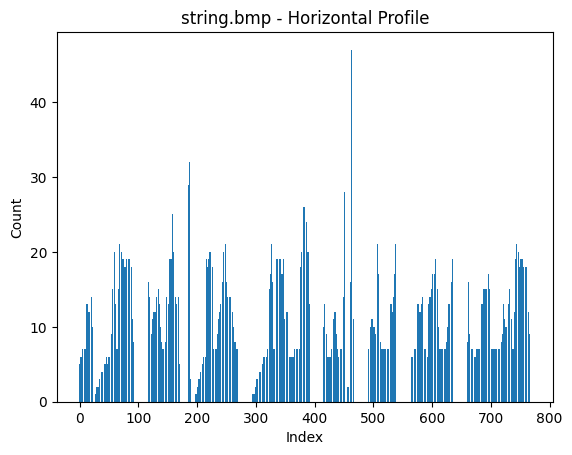

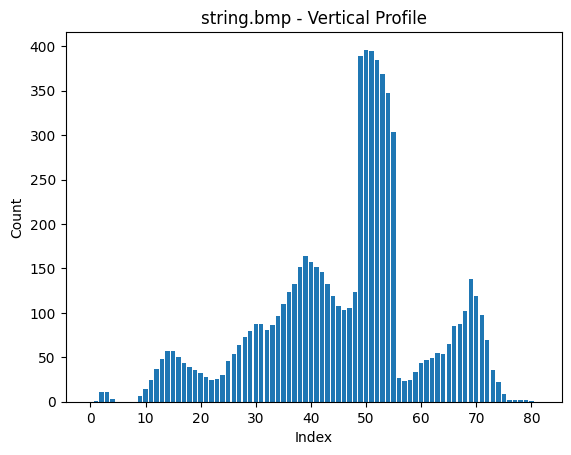

Saved image with bounding boxes to output\string.bmp_bounding_boxes.png


In [7]:
folder_path = 'input'
# Папка для сохранения изображений с обрамляющими прямоугольниками
profile_folder = 'output'

# Вызываем функцию обработки изображений
process_images_in_folder(folder_path, profile_folder)